<a href="https://colab.research.google.com/gist/dakilaledesma/3b5cca222a86ffdaa363908c1ceb0df1/intro-to-ml-assignment-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 1
### The very basics with Scikit-Learn

We will be starting out very easy for the first assignment. As we progress through the course, both the types of models and processes associated with these models will get harder and harder as we try to parse more complicated forms of information.

For now, let's take it easy: lets make some models that can determine what language a word is part of.

In this tutorial, we will be classifying whether a given 6-letter word is English or German. First, let's get some training and target data. See this table:

| Training (often denoted as 'X') | Target (often denoted as 'y' |
| ---- | ---- |
|ANYONE|English|
|UPROAR|English|
|YELLOW|English|
|BÄRGET|German|
|ZURUFE|German|
|WÜSTEM|German|

<sub> Table 1: Training words and target labels in two languages </sub>

The above table (make sure to read the headers) is a simple way to think about your training and target arrays. For classification, your data is structured in a way that "X" is the data you want to train on, and "y" is the label (or answer) associated with the data.

However, as you have learnt in class already, you cannot just put in words into a model in verbatim. You'll have to change these words into a number representation in order to use them as data for our models.

Python's ```ord()``` function allows us to convert a character into an integer. Using ```ord()``` and a for loop, we can iterate through a word and change every character into a number representation. We store these integers into an array that represents the original word.

In [1]:
string_to_ord = []
for char in "ANYONE":
  string_to_ord.append(ord(char))
print(string_to_ord)

[65, 78, 89, 79, 78, 69]


<sub> Code block 1: Changing letters into numbers using ```ord()``` </sub>

You can think of the above code from letter to ```ord()``` number representation like this:

|65|78|89|79|78|69|
|---|---|---|---|---|---|
|A|N|Y|O|N|E|

<sub> Table 2: Letter to ```ord()``` visualization </sub>


Now, when we make a two-dimensional array with the 6 words found in Table 1, it would look something like this:

In [2]:
training = [
  [65, 78, 89, 79, 78, 69],   # ANYONE
  [85, 80, 82, 79, 65, 82],   # UPROAR
  [89, 69, 76, 76, 79, 87],   # YELLOW
  [66, 196, 82, 71, 69, 84],  # BÄRGET
  [90, 85, 82, 85, 70, 69],   # ZURUFE
  [87, 220, 83, 84, 69, 77]   # WÜSTEM
]

<sub> Code block 2: Two-dimensional array representation of the 6 words found in Table 1 </sub>


As you can see, it's now a two-dimensional array. Six one-dimensional arrays representing the six words that we had, all contained in a larger array named ```training```.

Now that we have training data, we need to be able to tell the computer which data belongs in which category:

In [3]:
target = [
    0, # English  (ANYONE)
    0, # English  (UPROAR)
    0, # English  (YELLOW)
    1, # German   (BÄRGET)
    1, # German   (ZURUFE)
    1  # German   (WÜSTEM)
]


<sub> Code block 3 :Our one-dimensional target ("label"/"answers") array </sub>

As you can see, labels are also represented as numbers, in the same index as their respective training data value. So when the model predicts 0, we know that it's English. When the model predicts 1, we know that it's German.

Now, let's import the models needed for this assignment, and instantiate them. We will be using sklearn, and sklearn is *incredibly* easy to use if you need simpler models tackling simpler, easily differentiatable data such as English vs. German words. On tougher data, your mileage may vary.

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

knn_model = KNeighborsClassifier()
svm_model = svm.SVC()
mlp_nn = MLPClassifier()

<sub> Code block 4: Instantiating the models </sub>


Now, we can train each of the models that we have with the data that we created using the ```fit()``` function, feeding in both our training data as well as our answer (target) data:

In [5]:
knn_model.fit(training, target)
svm_model.fit(training, target)
mlp_nn.fit(training, target)

MLPClassifier()


<sub> Code block 5: Fitting ("training") the models with our training and target arrays </sub>

After they have trained, you can now predict using these models.

In [6]:
# Predicting “ANYONE”
print(knn_model.predict([[65, 78, 89, 79, 78, 69]])) # Output: 0 (English)
print(svm_model.predict([[65, 78, 89, 79, 78, 69]])) # Output: 0 (English)
print(mlp_nn.predict([[65, 78, 89, 79, 78, 69]])) # Output: 0 (English)

# Predicting “BÄRGET”
print(knn_model.predict([[66, 196, 82, 71, 69, 84]])) # Output: 1 (German)
print(svm_model.predict([[66, 196, 82, 71, 69, 84]])) # Output: 1 (German)
print(mlp_nn.predict([[66, 196, 82, 71, 69, 84]])) # Output: 1 (German)

# Note that predict() must also take a 2D array as our training data was a 2D array.

[0]
[0]
[0]
[1]
[1]
[1]


<sub> Code block 5: Prediction using the trainined models </sub>

Obviously, this is not very helpful as we're testing them on the same words they're being trained on. However, this should give you an idea of how to predict using the models you have trained.

Lastly, let's make a very simple bar graph using matplotlib, which is the last part of your assignment.

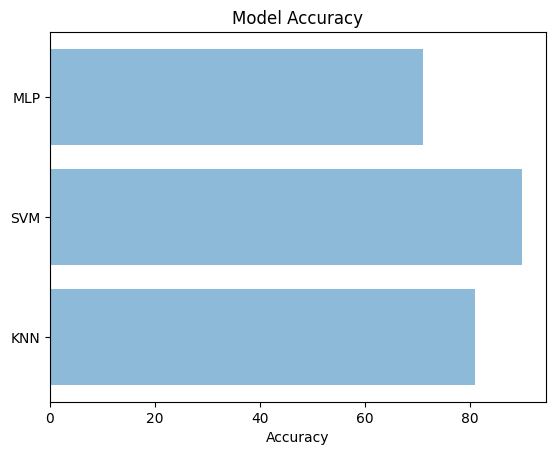

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Label text for each graph
labels = ("KNN", "SVM", "MLP")

# Numbers that you want the bars to represent
value = [81, 90, 71]

# Title of the plot
plt.title("Model Accuracy")

# Label for the x values of the bar graph
plt.xlabel("Accuracy")

# Drawing the bar graph
y_pos = np.arange(len(labels))
plt.barh(y_pos, value, align="center", alpha=0.5)
plt.yticks(y_pos, labels)

# Display the graph
plt.show()

<sub> Code block 5: Making a bar graph with predetermined values </sub>


This above is what you get! That should be all you need to do the assignment!